# Линейный дискриминант Фишера

## Генерация данных

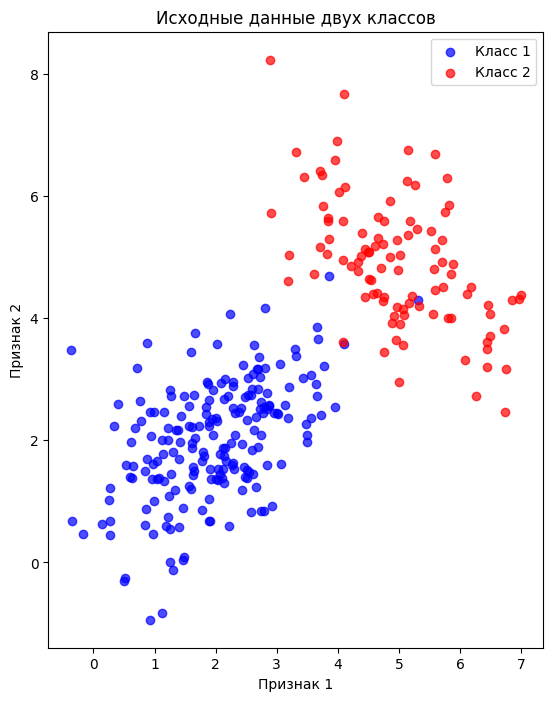

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
np.random.seed(42)

class_1_size = 200
class_2_size = 100

class_1 = np.random.multivariate_normal(mean=[2, 2], cov=[[1, 0.5], [0.5, 1]], size=class_1_size)
class_2 = np.random.multivariate_normal(mean=[5, 5], cov=[[1, -0.5], [-0.5, 1]], size=class_2_size)

# Объединение данных
X = np.vstack((class_1, class_2))
y = np.hstack((np.zeros(class_1_size), np.ones(class_2_size)))

# Визуализация данных
plt.figure(figsize=(8,8))
plt.scatter(class_1[:, 0], class_1[:, 1], label='Класс 1', c='blue', alpha=0.7)
plt.scatter(class_2[:, 0], class_2[:, 1], label='Класс 2', c='red', alpha=0.7)
plt.legend()
plt.title('Исходные данные двух классов')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.axis('scaled')
plt.show()

# Вычисление параметров

Для нахождения вектора нормали разделяющей поверхности $w$ можно использовать следующее соотношение:

$$
w \propto S^{-1}_w(m_1-m_2),
$$

где $S_w$ — внутриклассовая ковариация (сумма ковариаций внутри каждого класса), $m_1, m_2$ — центроиды соответствующих классов.

In [2]:
# Вычисление центроидов
m_1 = X[y==0].mean(axis=0)
m_2 = X[y==1].mean(axis=0)

# Вычисление матрицы внутриклассовой ковариации
# np.outer, тк без решейпа @ для двух векторов дает скалярное произведение
S_w = np.zeros((2, 2))
for sample in X[y==0]:
    S_w += np.outer(sample - m_1, sample - m_1)
S_w /= class_1_size
for sample in X[y==1]:
    S_w += np.outer(sample - m_2, sample - m_2)
S_w /= class_2_size
# Вычисление вектора нормали
W = np.linalg.inv(S_w) @ (m_1 - m_2)

# Для удобства нормируем
norm_W = W / np.linalg.norm(W,2)
norm_W

array([-0.74353295, -0.6686993 ])

Построим прямую проектировани и спроектированные объекты

In [3]:
# Проекции
projections = X @ norm_W
projections_dots = np.outer(projections, norm_W)

# Проекции центроидов
cent_1 = projections_dots[y==0].mean(axis=0)
cent_2 = projections_dots[y==1].mean(axis=0)

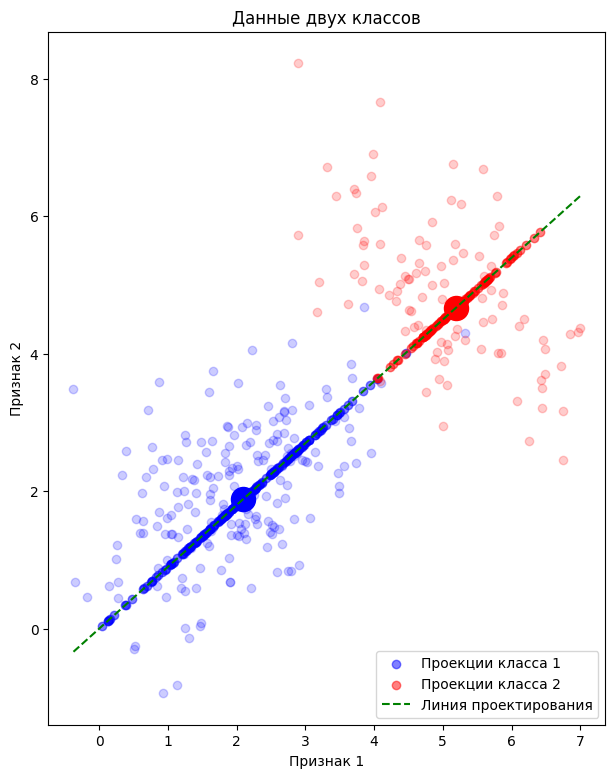

In [6]:
X_line = np.linspace(min(X[:,0]), max(X[:,0]), 100).reshape(-1, 1)
Y_line = norm_W[1]/norm_W[0] * X_line

# Визуализация исходных данных
plt.figure(figsize=(16,9))
plt.scatter(class_1[:, 0], class_1[:, 1], c='blue', alpha=0.2)
plt.scatter(class_2[:, 0], class_2[:, 1], c='red', alpha=0.2)
plt.scatter(projections_dots[y==0][:, 0], projections_dots[y==0][:, 1], label="Проекции класса 1", c='blue', alpha=0.5)
plt.scatter(projections_dots[y==1][:, 0], projections_dots[y==1][:, 1], label="Проекции класса 2", c='red', alpha=0.5)
plt.scatter(cent_1[0], cent_1[1], s=300, c='blue')
plt.scatter(cent_2[0], cent_2[1], s=300, c='red')
plt.plot(X_line, Y_line, color='green', linestyle='--', label='Линия проектирования')
plt.legend(loc='lower right')
plt.title("Данные двух классов")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.axis('scaled')
plt.show()

Проведем разделяющую поверхность с учетом количества элементов в каждом из классов.

In [ ]:
# Точка пересечения прямых
cent = class_2_size / (class_1_size + class_2_size) * cent_1 + class_1_size / (class_1_size + class_2_size) * cent_2
# Порог классификации
treshold = norm_W @ cent

# Разделяющая гиперплоскость
X_hyp = np.linspace(min(X[:,0]), max(X[:,0]), 100).reshape(-1, 1)
Y_hyp = -norm_W[0]/norm_W[1]*(X_hyp - cent[0]) + cent[1]

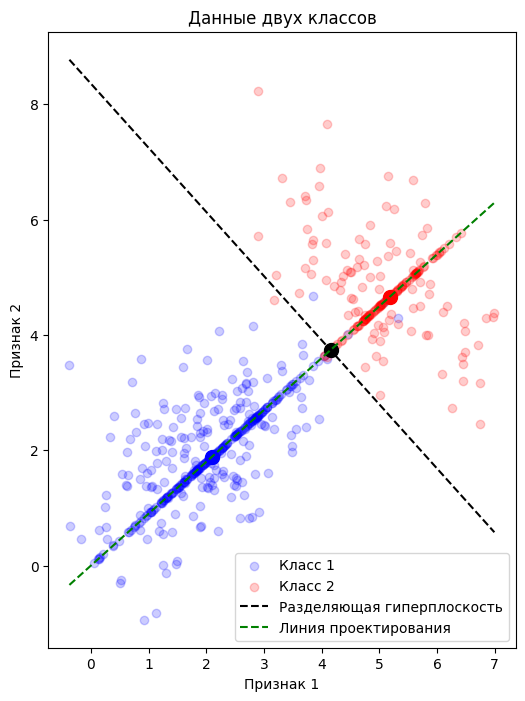

In [ ]:
# Визуализация исходных данных
plt.figure(figsize=(8,8))
plt.scatter(class_1[:, 0], class_1[:, 1], c='blue', alpha=0.2)
plt.scatter(class_2[:, 0], class_2[:, 1], c='red', alpha=0.2)
plt.scatter(projections_dots[y==0][:, 0], projections_dots[y==0][:, 1], c='blue', label='Класс 1', alpha=0.2)
plt.scatter(projections_dots[y==1][:, 0], projections_dots[y==1][:, 1], c='red', label='Класс 2', alpha=0.2)
plt.scatter(cent_1[0], cent_1[1], s=100, c='blue')
plt.scatter(cent_2[0], cent_2[1], s=100, c='red')
plt.plot(X_hyp, Y_hyp, color='black', linestyle='--', label='Разделяющая гиперплоскость')
plt.plot(X_line, Y_line, color='green', linestyle='--', label='Линия проектирования')
plt.scatter(cent[0] ,cent[1], c='black', s=100)
plt.legend(loc='lower right')
plt.title("Данные двух классов")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.axis('scaled')
plt.show()

In [ ]:
smpl = np.array([7,6])

if norm_W @ smpl < treshold:
  print('class = 2')
else:
  print('class = 1')

class = 2
